# Задание 1

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

### Загружаем данные по ссылке ниже, т.к. по этическим соображениям исходная база г.Бостона была удалена из набора Scikit-Learn

In [247]:
import numpy as np
import pandas as pd

from urllib.request import urlretrieve

data_url = "http://lib.stat.cmu.edu/datasets/boston"
csv_file = "d:/boston.csv"

urlretrieve(data_url, csv_file)

raw_df = pd.read_csv(csv_file, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# Формируем шапку БД:
with open(csv_file, encoding='utf-8') as st:
    i = 1
    feature_names = []
    for line in st:
        line = line.split()
        if i > 7 and i < 22:
            feature_names.append(line[0])
        elif i == 22: 
            break
        i += 1

# Проверяем наличие данных
data.shape

(506, 14)

#### Восстанавливаем таблицу Boston:

In [248]:
bn = {}
boston = {}

for i in range(len(feature_names)):
    d = [a for b in data[::, i:i+1] for a in b]
    bn[feature_names[i]] = d

boston = pd.DataFrame(bn)

boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### Массив с целевыми значениями (ценами на недвижимость):

In [249]:
target = boston["MEDV"]

target[:10]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

#### Массив данных для обучения х:

In [250]:
x = pd.DataFrame(data[::, :-1], columns=feature_names[:-1])

x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Проверим целостность данных:

In [251]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


#### Создадим таблицу y с целевыми значениями:

In [252]:
y = pd.DataFrame(target)

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEDV    506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


#### Разбиение выборки на тренировочную и тестовую

In [253]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

### Построение модели

In [254]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [255]:
lr.fit(x_train, y_train)

LinearRegression()

In [256]:
y_pred = lr.predict(x_test)

y_pred.shape

(152, 1)

#### Таблица сопоставления реальных значений и предсказанных

In [257]:
check_test = pd.DataFrame({
    "y_test": y_test["MEDV"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


### Метрики оценки качества моделей регрессии

#### Отклонение предсказанных значений от исходных в виде столбца 'error':

In [258]:
check_test["error"] = check_test["y_pred"] - check_test["y_test"]

check_test.head()

,y_test,y_pred,error
173,23.6,28.648960,5.048960
274,32.4,36.495014,4.095014
491,13.6,15.411193,1.811193
72,22.8,25.403213,2.603213
452,16.1,18.855280,2.755280


##### Среднеквадратичное отклонение:

In [259]:
from sklearn.metrics import mean_squared_error

mse1 = mean_squared_error(check_test["y_pred"], check_test["y_test"])

print('mse1 =', mse1)

mse1 = 21.517444231177112


#### Cредняя абсолютная ошибка:

In [260]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(check_test["y_pred"], check_test["y_test"])

3.1627098714573934

#### Коэффициенты линейной регрессии:

In [261]:
# Wo:
lr.intercept_

array([31.63108404])

In [262]:
# Wi:
lr.coef_

array([[-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
         3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
        -1.08208352e-02, -1.38599824e+00,  2.42727340e-01,
        -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]])

 #### Cтандартизация данных:

In [263]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=feature_names[:-1])

x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=feature_names[:-1])

####  Обучение модели на стандартизированных данных, и вывод диаграммы

In [264]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

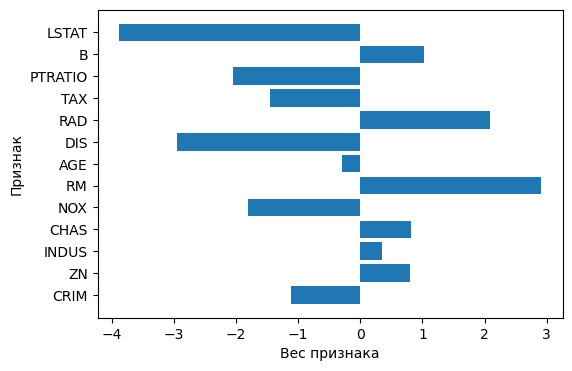

In [265]:
lr.fit(x_train_scaled, y_train)

plt.barh(feature_names[:-1], lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

#### Обучим модель, используя признаки, вес которых достаточно отличается от 0

In [266]:
important_features = [
    feature
    for feature, weight in zip(feature_names[:-1], lr.coef_.flatten())
    if np.abs(weight) > 0.5
]

print(important_features)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [267]:
lr.fit(
    x_train_scaled.loc[:, important_features],
    y_train
)

y_pred = lr.predict(x_test_scaled.loc[:, important_features])

mse2 = mean_squared_error(y_test, y_pred)

from sklearn.metrics import r2_score
r1 = r2_score(y_test, y_pred)

print('R2 = ', r1)
print("mse до: {}".format(mse1))
print("mse после: {}".format(mse2))

R2 =  0.6799128298280106
mse до: 21.517444231177112
mse после: 23.850685901073568


# Задание 2

Создайте модель под названием model с помощью класса RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрументы
n_estimators=1000, 
max_depth=12,
random_state=42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [268]:
from sklearn.ensemble import RandomForestRegressor

In [269]:
# модель - регрессор 
model =  RandomForestRegressor(n_estimators=1000,
                               max_depth=12,
                               random_state=42)

In [270]:
# обучение
model.fit(x_train, y_train.values[:, 0])
# предсказание
y_pred = model.predict(x_test)

In [271]:
# R2:
r2 = r2_score(y_test, y_pred)

# Среднеквадратичное отклонение:
mse3 = mean_squared_error(y_test, y_pred)

print('R2 = ', r2)
print('mse3 = ', mse3)

R2 =  0.87472606157312
mse3 =  9.334548946165196


### Сравнение двух методов

In [272]:
delta = round(((r2 - r1)/r1*100), 3)
print('Вывод: RandomForestRegressor относительно LinearRegression дал повышение точности обучения на', delta, '%')

Вывод: RandomForestRegressor относительно LinearRegression дал повышение точности обучения на 28.653 %
